In [3]:

import sys
sys.path.append('../')

from src.extract import ThreatDataExtractor
from src.transform import ThreatDataTransformer
from src.load import ThreatDataLoader
from src.analyze import ThreatAnalyzer
import logging


logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)








In [4]:
print(" EXTRACTION PHASE ")
extractor = ThreatDataExtractor()


try:
    abuseipdb_data = extractor.extract_abuseipdb_data(limit=30)
except Exception as e:
    print(f" AbuseIPDB extraction failed: {e}")
    abuseipdb_data = []


try:
    otx_data = extractor.extract_otx_data(limit=20)
except Exception as e:
    print(f" OTX extraction failed: {e}")
    otx_data = []

print(f" AbuseIPDB records: {len(abuseipdb_data)}")
print(f" OTX records: {len(otx_data)}")


combined_raw = abuseipdb_data + otx_data
print(f"Combined total raw records: {len(combined_raw)}")

EXTRACTION PHASE 


ERROR:src.extract:Error extracting from AbuseIPDB: 429 Client Error: Too Many Requests for url: https://api.abuseipdb.com/api/v2/blacklist?confidenceMinimum=75&limit=30
INFO:src.extract:Extracted 16 records from OTX


 AbuseIPDB records: 0
 OTX records: 16
Combined total raw records: 16


In [7]:


print("\n TRANSFORMATION PHASE ")

transformer = ThreatDataTransformer()
transformer.debug_input_data(abuseipdb_data, otx_data)

clean_data = transformer.transform_data(abuseipdb_data, otx_data)

print(f"Clean records after transformation: {len(clean_data)}")

INFO:src.transform:=== DEBUG: Input Data Analysis ===
INFO:src.transform:AbuseIPDB data: None or empty
INFO:src.transform:OTX data type: <class 'list'>
INFO:src.transform:OTX length: 16
INFO:src.transform:OTX sample type: <class 'dict'>
INFO:src.transform:OTX sample keys: ['ip_address', 'threat_type', 'confidence', 'source', 'pulse_id', 'extracted_at']
INFO:src.transform:OTX sample values: {'ip_address': '47.115.51.44', 'threat_type': 'Operation DRAGONCLONE: Chinese Telecom Targeted by Malware', 'confidence': None, 'source': 'otx', 'pulse_id': '6842f45696f96557e5f757b1', 'extracted_at': '2025-06-08T15:55:33.604515'}
INFO:src.transform:=== END DEBUG ===
INFO:src.transform:=== Starting data transformation ===
INFO:src.transform:Input - AbuseIPDB: 0 items
INFO:src.transform:Input - OTX: 16 items
INFO:src.transform:Processing AbuseIPDB data: 0 items
INFO:src.transform:Processing OTX data: 16 items
INFO:src.transform:OTX: 16 valid records, 0 invalid/skipped
INFO:src.transform:Combined data:


TRANSFORMATION PHASE 
Clean records after transformation: 16


In [9]:


print("\nLOADING PHASE ")
loader = ThreatDataLoader()
success = loader.load_data(clean_data)
print(f"Data loading successful: {success}")


 LOADING PHASE 


INFO:src.load:Connected to MongoDB successfully
INFO:src.load:Successfully loaded 16 records to MongoDB


Data loading successful: True



 ANALYSIS PHASE 


INFO:src.load:Connected to MongoDB successfully
INFO:src.load:Retrieved 55 records from MongoDB


Retrieved 55 records from database

# Cyber Threat Intelligence Report
Generated on: 2025-06-08 15:55:49

## Summary
- Total IPs analyzed: 55
- Average threat score: 23.09
- Data sources: virustotal, otx, abuseipdb

## Top 5 Most Malicious IPs
1. 185.220.102.8 (Score: 100, Country: DE)
2. 23.129.64.131 (Score: 100, Country: US)
3. 198.96.155.3 (Score: 100, Country: CA)
4. 192.42.116.16 (Score: 100, Country: NL)
5. 47.115.51.44 (Score: 50, Country: Unknown)

## Daily Threat Trends (Last 7 Days)
- 2025-06-08: 55 threats



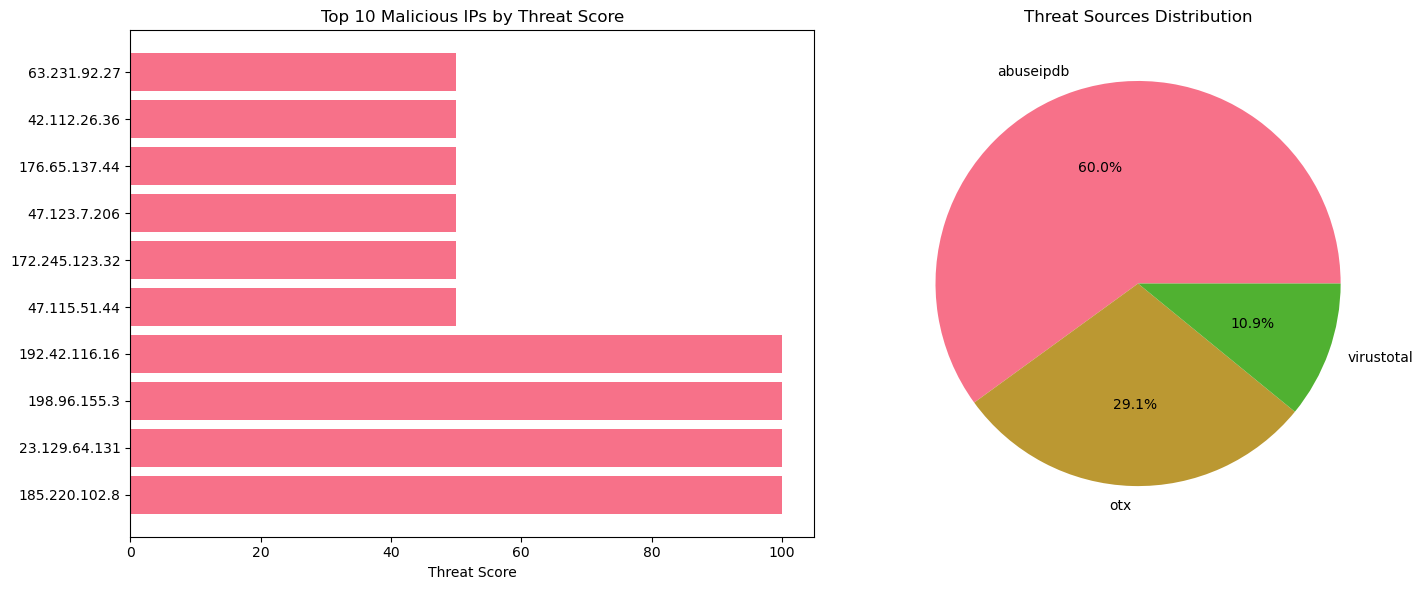

INFO:src.analyze:Visualizations saved to ../reports//threat_analysis.png


In [11]:
print("\n ANALYSIS PHASE ")

stored_data = loader.get_threat_data()
print(f"Retrieved {len(stored_data)} records from database")

analyzer = ThreatAnalyzer(stored_data)


report = analyzer.generate_report()
print(report)


analyzer.create_visualizations()

In [13]:

with open('../reports/threat_analysis.md', 'w') as f:
    f.write(report)
print("Report saved to reports/threat_analysis.md")

Report saved to reports/threat_analysis.md
